# 第14章 聚类

完整代码见最后

## 相似度或距离

In [1]:
import numpy as np

def minkowski_distance(x,y,p):
    """
    params p:
        p=1为曼哈顿距离；
        p=2为欧式距离
        p=无穷大为切比雪夫距离
    """
    return np.power(np.sum(np.power(np.abs(x-y),p)),1/p)

x = np.array([1,2,3,4])
y = np.array([2,3,4,5])
# 曼哈顿距离
minkowski_distance(x,y,1),np.linalg.norm(x-y,ord=1)

(4.0, 4.0)

In [2]:
# 切比雪夫距离
minkowski_distance(x,y,np.inf),np.linalg.norm(x-y,ord=np.inf)

(1.0, 1.0)

In [3]:
# 马氏距离要求样本数要大于维数，否则无法求协方差矩阵
def mahalanobis_distance(x,y):
    return np.sqrt((x-y).T.dot(np.linalg.pinv(np.cov(np.c_[x,y]))).dot(x-y))
x = np.array([1,2,3,4])
y = np.array([2,3,4,5])
mahalanobis_distance(x,y)

1.4142135623730954

In [4]:
# 相关系数
def correlation_coefficient(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    r = np.sum((x-x_mean)*(y-y_mean)) / (np.sum(np.power(x-x_mean,2))*np.sum(np.power(y-y_mean,2)))**0.5
    
    return

x = np.random.random(4)
y = np.random.random(4)


correlation_coefficient(x,y)

In [5]:
np.corrcoef(x,y)[0,1]

-0.27570204082709326

In [6]:
# 夹角余弦
def cosine(x,y):
    return x.dot(y)/np.sqrt(np.sum(x**2)*np.sum(y**2))

x = np.random.random(4)
y = np.random.random(4)
cosine(x,y)

0.814105005604939

In [7]:
import copy
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self,k):
        self.k = k
        self.G = None
        
    
    def centre_distance(self,data):
        return np.sum(data,axis=0)/len(data)
    
    def mean_distance(self,):
        pass
    
    def loss(self,):
        pass
    
    def minkowski_distance(self,x,p=2):
        """
        params p:
            p=1为曼哈顿距离；
            p=2为欧式距离
            p=无穷大为切比雪夫距离
        """
        return np.power(np.sum(np.power(np.abs(x),p)),1/p)
    
    def compare(self,a,b):
        for ai,bi in zip(a,b):
            if ai != bi:
                return False
        return True
    
    def fit(self,data):
        self.data = np.array(data)
        self.n_samples,self.n_features = self.data.shape
        
        if self.k > self.n_samples:
            self.k = self.n_samples-1
        
        # 初始化类的中心
#         m = [[data[i]] for i in range(self.k)]
        m = [[data[0]],[data[2]]]
        # 类
        G = {i:[] for i in range(self.k)}
        # 记录上一次的类
        OldG = copy.deepcopy(G)
        while True:
            for i in range(self.n_samples):
                 distance = np.zeros(self.k)
                 for j in range(self.k):
                        # 欧式距离的平方
                        distance[j] = self.minkowski_distance(data[i]-m[j])**2
                 # 寻找最小距离的索引
                 index = np.argmin(distance)
                 G[index].append(data[i])
            # 重新计算类的中心
            m = [self.centre_distance(G[i]) for i in range(self.k)]
            if self.compare(G,OldG):
                break
            # 存储上一次分类分布
            OldG = G
            # 清空G，进行下一轮的分配
            G = {i:[] for i in range(self.k)}
        self.G = {i:[(j,[list(i) for i in data].index(list(j))) for j in G[i]] for i in range(self.k)}
        self.m = m
        return self.G
    
    def plot(self,G):
        data = []
        y = []
#         print(G)
        for i in range(self.k):
            for j in range(len(G[i])):
                data.append(G[i][j][0])
                y.append(i)
            
        data = np.array(data)
        y = np.array(y)
        plt.scatter(data[:,0],data[:,1],c=y)
        
    
data = np.array([
    [0,0,0,1,0],
    [0,0,0,0,1],
    [0,0,0,0,1],
    [1,0,1,0,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [1,0,1,1,0],
    [0,1,1,0,0],
    [0,0,1,1,1],
    [0,1,1,0,0]
])
kmeans = KMeans(2)
G = kmeans.fit(data.T)
# G,kmeans.m
G

{0: [(array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0]), 0),
  (array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0]), 3),
  (array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0]), 4)],
 1: [(array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1]), 1),
  (array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1]), 2)]}

In [8]:
data = np.array([
    [0,2],
    [0,0],
    [1,0],
    [5,0],
    [5,2]
])

kmeans = KMeans(2)
G = kmeans.fit(data)
G

{0: [(array([0, 2]), 0)],
 1: [(array([0, 0]), 1),
  (array([1, 0]), 2),
  (array([5, 0]), 3),
  (array([5, 2]), 4)]}

In [9]:
from sklearn import datasets  # 导入sklearn中集成的数据集

iris = datasets.load_iris()
data = iris.data
target = iris.target
data.shape

(150, 4)

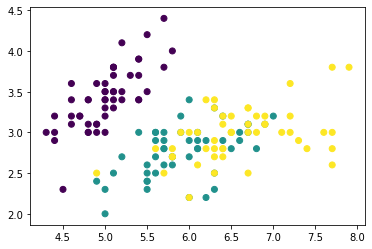

In [10]:
plt.scatter(data[:,0],data[:,1],c=target)

In [11]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2)
kmean.fit(data.T);
kmean.labels_,kmean.cluster_centers_.round(5)

(array([1, 0, 1, 0]),
 array([[1.85, 1.6 , 1.7 , 1.65, 1.9 , 2.15, 1.85, 1.8 , 1.55, 1.6 , 1.95,
         1.8 , 1.55, 1.55, 2.1 , 2.4 , 2.15, 1.9 , 2.05, 2.05, 1.8 , 2.05,
         1.9 , 1.9 , 1.8 , 1.6 , 1.9 , 1.85, 1.8 , 1.7 , 1.65, 1.9 , 2.1 ,
         2.2 , 1.65, 1.7 , 1.85, 1.85, 1.6 , 1.8 , 1.9 , 1.3 , 1.7 , 2.05,
         2.1 , 1.65, 2.  , 1.7 , 1.95, 1.75, 2.3 , 2.35, 2.3 , 1.8 , 2.15,
         2.05, 2.45, 1.7 , 2.1 , 2.05, 1.5 , 2.25, 1.6 , 2.15, 2.1 , 2.25,
         2.25, 1.85, 1.85, 1.8 , 2.5 , 2.05, 2.  , 2.  , 2.1 , 2.2 , 2.1 ,
         2.35, 2.2 , 1.8 , 1.75, 1.7 , 1.95, 2.15, 2.25, 2.5 , 2.3 , 1.8 ,
         2.15, 1.9 , 1.9 , 2.2 , 1.9 , 1.65, 2.  , 2.1 , 2.1 , 2.1 , 1.8 ,
         2.05, 2.9 , 2.3 , 2.55, 2.35, 2.6 , 2.55, 2.1 , 2.35, 2.15, 3.05,
         2.6 , 2.3 , 2.55, 2.25, 2.6 , 2.75, 2.4 , 3.  , 2.45, 1.85, 2.75,
         2.4 , 2.4 , 2.25, 2.7 , 2.5 , 2.3 , 2.4 , 2.45, 2.3 , 2.35, 2.9 ,
         2.5 , 2.15, 2.  , 2.65, 2.9 , 2.45, 2.4 , 2.6 , 2.75, 2.7 , 2.3 ,
   

In [12]:
class Hierarchical:
    def __init__(self,k):
        self.k = k
    
    def minkowski_distance(self,x,p=2):
        """
        params p:
            p=1为曼哈顿距离；
            p=2为欧式距离
            p=无穷大为切比雪夫距离
        """
        return np.power(np.sum(np.power(np.abs(x),p)),1/p)
    
    def distance_between_classes(self,g1,g2):
        """
        两个聚类之间的距离即为两类中样本点的最短距离
        """
        # 存储聚类之间样本点的距离
        dg = np.array([[self.minkowski_distance(i-j) for j in g2] for i in g1])
        min_distance = np.min(dg)
        return min_distance
    
    def compare(self,a,b):
        for ai,bi in zip(a,b):
            if ai != bi:
                return False
        return True
    
    def centre_distance(self,data):
        return np.sum(data,axis=0)/len(data)
    
    def fit(self,data):
        self.n_samples,self.n_features = data.shape
        # 初始每个即为一个类，每个点即为当前类的中心
        m = [[list(data[i])] for i in range(self.n_samples)]
        # n个样本两两之间的欧式距离
        D = [[self.minkowski_distance(data[i]-data[j]) for j in range(self.n_samples)] for i in range(self.n_samples)]
        for i in range(len(D)):
            D[i][i] = np.inf
        # n个点即n个类
        G = {i:[data[i]] for i in range(self.n_samples)}
        n = self.n_samples # 类总数
        
        
        while n > self.k:
            dg = np.array([[np.inf for j in range(len(G))] for i in range(len(G))])
            #　计算两两聚类之间的最短距离-类间距离
            for i in range(len(G)):
                for j in range(len(G)):
                    if i<j:
                        dg[i,j]=self.distance_between_classes(G[i],G[j])
            
            min_distance = np.min(dg)
            min_distance_index = np.argwhere(dg == min_distance)
            min_distance_index = np.sort(min_distance_index)
            
            # 将距离最小的类进行合并
            for i in range(len(min_distance_index[:self.k])):
                if i > 0 and self.compare(min_distance_index[i-1],min_distance_index[i]):
                    pass
                key0,key1 = min_distance_index[i]
                G[key0].extend(G[key1])
                G.pop(key1)
                n -= 1
                if n <= self.k:
                    break
                    
            G = {i:G[list(G.keys())[i]] for i in range(len(G))}
        self.m = [self.centre_distance(G[i]) for i in range(self.k)]
        
        return G
            
    def plot(self,G):
        data = []
        y = []
        for i in range(len(G)):
            for j in range(len(G[i])):
                y.append(i)
                data.append(G[i][j])
        data = np.array(data,dtype=int)
        y = np.array(y)
        plt.scatter(data[:,0],data[:,1],c=y)
        
    
# data = np.array([
#     [0,2],
#     [0,0],
#     [1,0],
#     [5,0],
#     [5,2]
# ])

data = np.array([
    [0,0,0,1,0],
    [0,0,0,0,1],
    [0,0,0,0,1],
    [1,0,1,0,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [1,0,1,1,0],
    [0,1,1,0,0],
    [0,0,1,1,1],
    [0,1,1,0,0]
])

data = data.T
hiera = Hierarchical(k=2)
G = hiera.fit(data)
G

{0: [array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0]),
  array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1]),
  array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0]),
  array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1])],
 1: [array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0])]}

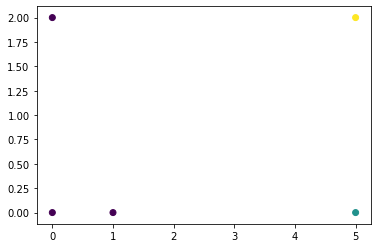

In [13]:
import copy
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self,k,m=None):
        self.k = k
        self.G = None
        self.m = m
        
    
    def centre_distance(self,data):
        return np.sum(data,axis=0)/len(data)
    
    def mean_distance(self,):
        pass
    
    def loss(self,):
        pass
    
    def minkowski_distance(self,x,p=2):
        """
        params p:
            p=1为曼哈顿距离；
            p=2为欧式距离
            p=无穷大为切比雪夫距离
        """
        return np.power(np.sum(np.power(np.abs(x),p)),1/p)
    
    def compare(self,a,b):
        for ai,bi in zip(a,b):
            if ai != bi:
                return False
        return True
    
    def fit(self,data):
        self.data = np.array(data)
        self.n_samples,self.n_features = self.data.shape
        
        if self.k > self.n_samples:
            self.k = self.n_samples-1
        
        # 初始化类的中心
        m = self.m
        if m is None:
            m = [[data[i]] for i in range(self.k)]
#         print(m)
        # 类
        G = {i:[] for i in range(self.k)}
        # 记录上一次的类
        OldG = copy.deepcopy(G)
        while True:
            for i in range(self.n_samples):
                 distance = np.zeros(self.k)
                 for j in range(self.k):
                        # 欧式距离的平方
                        distance[j] = self.minkowski_distance(data[i]-m[j])**2
                 # 寻找最小距离的索引
                 index = np.argmin(distance)
                 G[index].append(data[i])
            # 重新计算类的中心
            m = [self.centre_distance(G[i]) for i in range(self.k)]
            if self.compare(G,OldG):
                break
            # 存储上一次分类分布
            OldG = G
            # 清空G，进行下一轮的分配
            G = {i:[] for i in range(self.k)}
        self.G = {i:[(j,[list(i) for i in data].index(list(j))) for j in G[i]] for i in range(self.k)}
        self.m = m
        return self.G
    
    def plot(self,G):
        data = []
        y = []
#         print(G)
        for i in range(self.k):
            for j in range(len(G[i])):
                data.append(G[i][j][0])
                y.append(i)
            
        data = np.array(data)
        y = np.array(y)
        plt.scatter(data[:,0],data[:,1],c=y)
        
    
data = np.array([
    [0,2],
    [0,0],
    [1,0],
    [5,0],
    [5,2]
])
hiera = Hierarchical(k=3)
hiera.fit(data)

m=hiera.m

kmeans = KMeans(3,m)
G = kmeans.fit(data)
kmeans.plot(G)

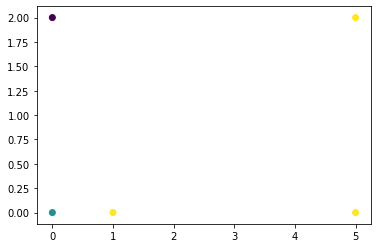

In [14]:
kmeans = KMeans(3)
G = kmeans.fit(data)
kmeans.plot(G)

In [15]:
data = np.array([
    [0,0,0,1,0],
    [0,0,0,0,1],
    [0,0,0,0,1],
    [1,0,1,0,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [1,0,1,1,0],
    [0,1,1,0,0],
    [0,0,1,1,1],
    [0,1,1,0,0]
])

data = data.T
k=3

hiera = Hierarchical(k=k)
hiera.fit(data)

kmeans = KMeans(k,hiera.m)
G = kmeans.fit(data)
G

{0: [(array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0]), 0),
  (array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1]), 2),
  (array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0]), 3)],
 1: [(array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1]), 1)],
 2: [(array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0]), 4)]}

## 完整代码=>层次聚类+kmeans聚类

首先通过层次聚类找到k个中心，然后在通过kmeans进行聚类

层次聚类，首先将每个样本都单独看成一个聚类，之后，计算每个聚类之间的类间距离（也就是每个聚类之间的样本之间的最短的距离），都计算完后，找到距离最小的两个聚类进行合并，合成成为新的一个聚类。然后重新继续计算，直到只剩下k个类为止。

kmeans聚类，通过层次聚类找到了k个聚类之后，计算k个聚类的中心，将样本点全部进行划分，并且重新计算聚类的中心点，直到聚类的分布不便为止。

In [16]:
import copy
import matplotlib.pyplot as plt
import numpy as np

class Hierarchical:
    def __init__(self,k):
        self.k = k
    
    def minkowski_distance(self,x,p=2):
        """
        params p:
            p=1为曼哈顿距离；
            p=2为欧式距离
            p=无穷大为切比雪夫距离
        """
        return np.power(np.sum(np.power(np.abs(x),p)),1/p)
    
    def distance_between_classes(self,g1,g2):
        """
        两个聚类之间的距离即为两类中样本点的最短距离
        """
        # 存储聚类之间样本点的距离
        dg = np.array([[self.minkowski_distance(i-j) for j in g2] for i in g1])
        min_distance = np.min(dg)
        return min_distance
    
    def compare(self,a,b):
        for ai,bi in zip(a,b):
            if ai != bi:
                return False
        return True
    
    def centre_distance(self,data):
        return np.sum(data,axis=0)/len(data)
    
    def fit(self,data):
        self.n_samples,self.n_features = data.shape
        # 初始每个即为一个类，每个点即为当前类的中心
        m = [[list(data[i])] for i in range(self.n_samples)]
        # n个样本两两之间的欧式距离
        D = [[self.minkowski_distance(data[i]-data[j]) for j in range(self.n_samples)] for i in range(self.n_samples)]
        for i in range(len(D)):
            D[i][i] = np.inf
        # n个点即n个类
        G = {i:[data[i]] for i in range(self.n_samples)}
        n = self.n_samples # 类总数
        
        
        while n > self.k:
            dg = np.array([[np.inf for j in range(len(G))] for i in range(len(G))])
            #　计算两两聚类之间的最短距离-类间距离
            for i in range(len(G)):
                for j in range(len(G)):
                    if i<j:
                        dg[i,j]=self.distance_between_classes(G[i],G[j])
            
            min_distance = np.min(dg)
            min_distance_index = np.argwhere(dg == min_distance)
            min_distance_index = np.sort(min_distance_index)
            
            # 将距离最小的类进行合并
            for i in range(len(min_distance_index[:self.k])):
                if i > 0 and self.compare(min_distance_index[i-1],min_distance_index[i]):
                    pass
                key0,key1 = min_distance_index[i]
                G[key0].extend(G[key1])
                G.pop(key1)
                n -= 1
                if n <= self.k:
                    break
                    
            G = {i:G[list(G.keys())[i]] for i in range(len(G))}
        self.m = [self.centre_distance(G[i]) for i in range(self.k)]
        
        return G
            
    def plot(self,G):
        data = []
        y = []
        for i in range(len(G)):
            for j in range(len(G[i])):
                y.append(i)
                data.append(G[i][j])
        data = np.array(data,dtype=int)
        y = np.array(y)
        plt.scatter(data[:,0],data[:,1],c=y)
    
class KMeans:
    def __init__(self,k,m=None):
        self.k = k
        self.G = None
        self.m = m
        
    
    def centre_distance(self,data):
        return np.sum(data,axis=0)/len(data)
    
    def mean_distance(self,):
        pass
    
    def loss(self,):
        pass
    
    def minkowski_distance(self,x,p=2):
        """
        params p:
            p=1为曼哈顿距离；
            p=2为欧式距离
            p=无穷大为切比雪夫距离
        """
        return np.power(np.sum(np.power(np.abs(x),p)),1/p)
    
    def compare(self,a,b):
        for ai,bi in zip(a,b):
            if ai != bi:
                return False
        return True
    
    def fit(self,data):
        self.data = np.array(data)
        self.n_samples,self.n_features = self.data.shape
        
        if self.k > self.n_samples:
            self.k = self.n_samples-1
        
        # 初始化类的中心
        m = self.m
        if m is None:
            m = [[data[i]] for i in range(self.k)]
#         print(m)
        # 类
        G = {i:[] for i in range(self.k)}
        # 记录上一次的类
        OldG = copy.deepcopy(G)
        while True:
            for i in range(self.n_samples):
                 distance = np.zeros(self.k)
                 for j in range(self.k):
                        # 欧式距离的平方
                        distance[j] = self.minkowski_distance(data[i]-m[j])**2
                 # 寻找最小距离的索引
                 index = np.argmin(distance)
                 G[index].append(data[i])
            # 重新计算类的中心
            m = [self.centre_distance(G[i]) for i in range(self.k)]
            if self.compare(G,OldG):
                break
            # 存储上一次分类分布
            OldG = G
            # 清空G，进行下一轮的分配
            G = {i:[] for i in range(self.k)}
        self.G = {i:[(j,[list(i) for i in data].index(list(j))) for j in G[i]] for i in range(self.k)}
        self.m = m
        return self.G
    
    def plot(self,G):
        data = []
        y = []
#         print(G)
        for i in range(self.k):
            for j in range(len(G[i])):
                data.append(G[i][j][0])
                y.append(i)
            
        data = np.array(data)
        y = np.array(y)
        plt.scatter(data[:,0],data[:,1],c=y)

data = np.array([
    [0,0,0,1,0],
    [0,0,0,0,1],
    [0,0,0,0,1],
    [1,0,1,0,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [1,0,1,1,0],
    [0,1,1,0,0],
    [0,0,1,1,1],
    [0,1,1,0,0]
])

data = data.T
k=2

hiera = Hierarchical(k=k)
hiera.fit(data)

kmeans = KMeans(k,hiera.m)
G = kmeans.fit(data)
G # 结果和书上一样

{0: [(array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0]), 0),
  (array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1]), 1),
  (array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1]), 2),
  (array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0]), 3)],
 1: [(array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0]), 4)]}